In [0]:
import numpy as np
import pandas as pd
import math, random

In [0]:
data = pd.DataFrame({"col1": random.sample(range(1, 2000), 200)})
data.size

N = data.size

In [0]:
data

,col1
0,672
1,925
2,446
3,1236
4,945
5,483
6,1950
7,1215
8,255
9,1770


In [0]:
# Scott's rule
bin_num = int(3.49*(data.std())*(N**(-1/3)))
print("Bin Size: ", bin_num)

Bin Size:  349


In [0]:
# Rice Rule
bin_num = int(N**(1/3)*2)
print("Bin Size: ", bin_num)

Bin Size:  11


In [0]:
# Freedman-Diaconis’s Rule
median = data['col1'].median()
left = pd.DataFrame({"col1": [data['col1'][i] for i in range(200) if data['col1'][i] <= median]})
right = pd.DataFrame({"col1": [data['col1'][i] for i in range(200) if data['col1'][i] > median]})
bin_num = int( 2*(right.median()-left.median())*(N**(-1/3)) )
print("Bin Size: ", bin_num)

Bin Size:  348


In [0]:
# Struge's rule
bin_num =  math.ceil(1 + 3.322*math.log2(200))
print("Bin Size: ", bin_num)

Bin Size:  27


In [0]:
width = (data['col1'].max()-data['col1'].min())/bin_num
print("width of each bin: ", width)

bins = [[] for i in range(bin_num+1)]

for i in range(200):
  bins[math.ceil((data['col1'].iloc[i]-data['col1'].min())/width)].append(data['col1'].iloc[i])
for i in range(1, len(bins)):
  print("Bin " + str(i) + ":", "range:", data['col1'].min()+width*(i-1), "-", data['col1'].min()+width*(i))
  print(bins[i])

bins[1].append(bins[0][0])

width of each bin:  73.29629629629629


IndexError: ignored

(array([19., 23., 17., 24., 21., 18., 24., 14., 13., 27.]),
 array([   6. ,  203.9,  401.8,  599.7,  797.6,  995.5, 1193.4, 1391.3,
        1589.2, 1787.1, 1985. ]),
 <a list of 10 Patch objects>)

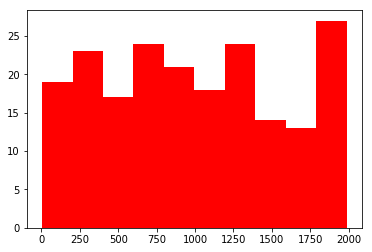

In [0]:
# Data with Noise
import matplotlib.pyplot as plt
plt.hist(data['col1'],facecolor="red")

(array([6., 5., 5., 5., 5., 2., 9., 2., 2., 5.]),
 array([ 151. ,  330.9,  510.8,  690.7,  870.6, 1050.5, 1230.4, 1410.3,
        1590.2, 1770.1, 1950. ]),
 <a list of 10 Patch objects>)

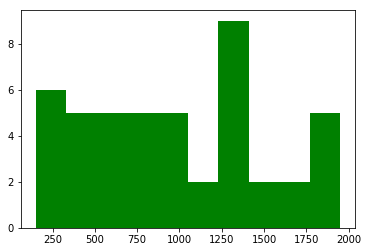

In [0]:
smooth_data = []
for i in bins:
  for j in range(len(i)):
    if abs(i[-1]-i[j]) < abs(i[0]-i[j]):
      smooth_data.append(i[-1])
    else:
      smooth_data.append(i[0])
plt.hist(smooth_data,facecolor="green")

In [0]:
data['col1'].std()

586.3293566523529

# **Equal Depth**

In [0]:
data_array = [data['col1'].iloc[i] for i in range(200)]
data_array.sort()
bin_num = 10
width = N//bin_num
bins = []
i = 0
while i < 200:
  bins.append(data_array[i:i+width])
  i += width


[[6, 14, 37, 59, 60, 70, 72, 80, 88, 92, 99, 129, 151, 152, 161, 162, 174, 180, 195, 216], [226, 228, 229, 231, 236, 248, 255, 266, 269, 271, 282, 290, 293, 303, 305, 320, 322, 373, 390, 391], [394, 399, 411, 418, 425, 431, 443, 446, 450, 457, 464, 476, 483, 508, 523, 584, 587, 588, 595, 605], [606, 608, 620, 624, 648, 660, 668, 672, 675, 684, 696, 731, 734, 740, 746, 748, 756, 763, 764, 765], [768, 778, 797, 800, 814, 816, 818, 857, 861, 880, 881, 910, 923, 925, 928, 940, 943, 945, 951, 956], [973, 984, 989, 992, 1017, 1030, 1040, 1046, 1050, 1074, 1080, 1105, 1108, 1112, 1115, 1126, 1137, 1160, 1166, 1174], [1187, 1191, 1204, 1214, 1215, 1236, 1237, 1254, 1260, 1266, 1277, 1292, 1305, 1310, 1312, 1321, 1327, 1336, 1337, 1341], [1343, 1360, 1368, 1380, 1388, 1391, 1428, 1431, 1448, 1472, 1489, 1498, 1532, 1534, 1540, 1546, 1549, 1567, 1579, 1584], [1590, 1592, 1596, 1636, 1644, 1704, 1707, 1745, 1750, 1763, 1770, 1782, 1785, 1793, 1803, 1817, 1828, 1830, 1846, 1855], [1868, 1869, 1878

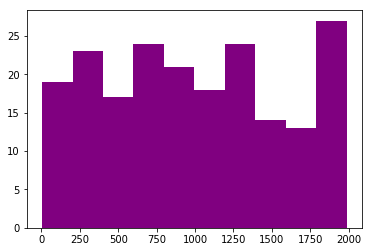

In [0]:
# Data with noise
plt.hist(data_array,facecolor="purple")
print(bins)

(array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

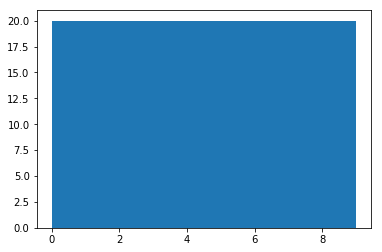

In [0]:
labels = {}
label = 0
equal_depth = []
for i in bins:
  labels[label] = (i[0], i[-1])
  equal_depth += [label for i in range(len(i))]
  label += 1
plt.hist(equal_depth)

(array([40.,  0., 20., 20., 20., 20., 20., 20., 20., 20.]),
 array([ 109.85 ,  291.305,  472.76 ,  654.215,  835.67 , 1017.125,
        1198.58 , 1380.035, 1561.49 , 1742.945, 1924.4  ]),
 <a list of 10 Patch objects>)

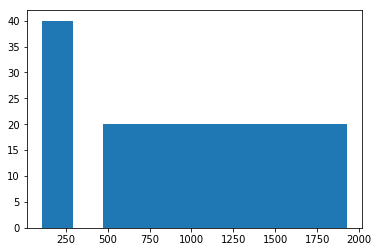

In [0]:
# smoothened Data
smooth_data = []
for i in bins:
  mean = sum(i)/len(i)
  for j in range(len(i)):
    smooth_data.append(mean)
plt.hist(smooth_data)

# **Part B**

In [0]:
# without label
data = pd.DataFrame({"col1": [random.randint(1, 2000) for i in range(200)]})
data.std()

col1    561.713743
dtype: float64

In [0]:
# distributing random labels

a = [i for i in range(200)]
num_label_A = int(0.6*200)
num_label_B = int(0.4*200)
A_label = [0 for i in range(num_label_A)]
B_label = [1 for i in range(num_label_B)]
labels = A_label + B_label

random.shuffle(labels)
data['col2'] = [labels[i] for i in range(N)]
data.head()

,col1,col2
0,147,0
1,726,1
2,1227,0
3,144,0
4,420,0


In [0]:
data.groupby('col2').count() # verifying count

,col1
col2,
0,120
1,80


In [0]:
# Picking random 50% without replacement
a = [i for i in range(200)]
random.shuffle(a)
sample = []
for i in range(int(N*0.5)):
  sample.append(data.iloc[a[i]])
test = pd.DataFrame(sample)
test.reset_index(drop=True, inplace=True)
test.head()
print("STD for sampling 50% without replacement:", test.std())

STD for sampling 50% without replacement: col1    537.335119
col2      0.490207
dtype: float64


In [0]:
# Stratified Sampling

A_label_index = []
B_label_index = []

for i in range(N):
  if data['col2'].iloc[i] == 0:
    A_label_index.append(i)
  else:
    B_label_index.append(i)

random.shuffle(A_label_index)
random.shuffle(B_label_index)

A_List = []
B_List = []


num_A_label = int(N*0.5*0.6)
num_B_label = int(N*0.5*0.4)

sample = []
for i in range(num_A_label):
  sample.append(data.iloc[A_label_index[i]])
for i in range(num_B_label):
  sample.append(data.iloc[B_label_index[i]])

random.shuffle(sample)
stratified = pd.DataFrame(sample)
stratified.reset_index(drop=True, inplace=True)
stratified.head()
print("STD for stratified sampling without replacement:", stratified.std())

STD for stratified sampling without replacement: col1    520.196270
col2      0.492366
dtype: float64


In [0]:
data.shape

(200, 2)

In [0]:
# Picking random 50% with replacement
a = [random.randint(0, 99) for i in range(200)]
sample = []
for i in range(int(N*0.5)):
  sample.append(data.iloc[a[i]])
test = pd.DataFrame(sample)
test.reset_index(drop=True, inplace=True)
test.head()
print("STD for sampling 50% with replacement:", stratified.std())

STD for sampling 50% with replacement: col1    520.196270
col2      0.492366
dtype: float64


In [0]:
# stratified sampling
sample = []
for i in range(num_A_label):
  sample.append(data.iloc[A_label_index[random.randint(0, len(A_label_index)-1)]])
for i in range(num_B_label):
  sample.append(data.iloc[B_label_index[random.randint(0, len(B_label_index)-1)]])
random.shuffle(sample)
stratified = pd.DataFrame(sample)
stratified.reset_index(drop=True, inplace=True)
stratified.head()
print("STD for stratified sampling with replacement:", stratified.std())

STD for stratified sampling with replacement: col1    498.125503
col2      0.492366
dtype: float64
